## Importing required libraries

In [947]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

## Loading Datasets
Here I have loaded the given 'Bike Sharing' dataset using the pandas library.

In [948]:
df = pd.read_csv('data/hour.csv')

## Data Query

#### Printing the dataset

In [949]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


#### Printing the shape of the dataset to know how many rows and columns we have:

In [950]:
df.shape

(17379, 17)

#### Printing more info to know how many non zero elements present in a column and what the data types are:

In [951]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Here we can see there are total 17 columns from which there are 16 numerical columns and 1 object column.

#### Printing statistical info of the numerical columns of the dataset:

In [850]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


#### Know about the columns 

In [946]:
df.columns

Index(['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday',
       'weather', 'temp', 'feeling_temp', 'humidity', 'windspeed', 'casual',
       'registered', 'total', 'day'],
      dtype='object')

#### From the column names and the source of the dataset we came to know that:

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
		1: Clear, Few clouds, Partly cloudy, Partly cloudy
		2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds,Mist
        3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, 
           Light Rain + Scattered clouds
        4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

#### Changing the column names for better understanding

In [851]:
df = df.rename(columns={'dteday': 'date', "yr":"year","mnth":"month",'hr':'hour',"weathersit":"weather","atemp":"feeling_temp","hum":"humidity","cnt":"total"})

In [852]:
df.head(10)

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,feeling_temp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


## Dropping unusefull columns:

Here we will drop the 'instant' column, as it does not contain any meaningfull information.
We may eventually drop other columns after doing some analysis. 

In [853]:
df.drop(['instant'], axis =1, inplace = True)

## Feature extraction:
Here we have extracted the 'day' of the month from the 'date' column.

In [854]:
df['date'] = df['date'].astype('datetime64')
df['day'] = df.date.dt.day
df.drop(['date'], axis =1, inplace = True)

## Dealing with missing values
Any missing value in any column is harmful for our prediction process. So we have to deal with them.

#### Null values:

In [855]:
df.isnull().sum()

season          0
year            0
month           0
hour            0
holiday         0
weekday         0
workingday      0
weather         0
temp            0
feeling_temp    0
humidity        0
windspeed       0
casual          0
registered      0
total           0
day             0
dtype: int64

There are no null values in this dataset.

#### Zero values:

In [856]:
df.isin([0]).sum()

season              0
year             8645
month               0
hour              726
holiday         16879
weekday          2502
workingday       5514
weather             0
temp                0
feeling_temp        2
humidity           22
windspeed        2180
casual           1581
registered         24
total               0
day                 0
dtype: int64

There are some zero values in various columns. 
Here,the columns 'year', 'hour' , 'holiday', 'weekday', 'workingday', 'casual', 'registered' , 'day' are ordinal features so they can contain '0' in them , we don't have to deal with them.
The columns 'humidity', 'windspeed' , 'feeling_temp' have '0' in them so we have to deal with it.

- Humidity:

In [857]:
median_humidity = df.groupby(['weather'])['humidity'].median()
print("Median humidity for various weathers: " , median_humidity)

Median humidity for various weathers:  weather
1    0.56
2    0.71
3    0.87
4    0.86
Name: humidity, dtype: float64


In [858]:
def impute_humidity(cols):
    humidity = cols[0]
    weather = cols[1]

    if weather == 1:
        if humidity == 0:
            return 0.56
    if weather == 2:
        if humidity == 0:
            return 0.71
    if weather == 3:
        if humidity == 0:
            return 0.87
    if weather == 3:
        if humidity == 0:
            return 0.86
        
        else:
            return humidity
    else:
        return humidity

In [859]:
df['humidity'] = df[['humidity','weather']].apply(impute_humidity,axis=1)

We have replaced the zero values in the 'Humidity' column with the median values according to the weather condition.

 - Feeling_Temp:

In [860]:
df.drop(df.index[df['feeling_temp'] == 0], inplace = True)

There are only two 'zero' values in the 'feeling_temp' column. So we will drop those rows.

- windspeed:

In [861]:
median_windspeed = df.groupby(['weather'])['windspeed'].median()
print("Median windspeed for various weathers: " , median_windspeed)

Median windspeed for various weathers:  weather
1    0.1940
2    0.1642
3    0.1940
4    0.1940
Name: windspeed, dtype: float64


In [862]:
def impute_windspeed(cols):
    windspeed = cols[0]
    weather = cols[1]

    if weather == 1:
        if windspeed == 0:
            return 0.1940
    if weather == 2:
        if windspeed == 0:
            return 0.1642
    if weather == 3:
        if windspeed == 0:
            return 0.1940
    if weather == 4:
        if windspeed == 0:
            return 0.1940
        
        else:
            return windspeed
    else:
        return windspeed

In [863]:
df['windspeed'] = df[['windspeed','weather']].apply(impute_windspeed,axis=1)

We have replaced the zero values in the 'Windspeed' column with the median values according to the weather condition.

### Handling Outliers
An outlier is an observation that lies an abnormal distance from other values in a column which can affect our prediction accuracy so we need to remove them

In [864]:
df2 = df.copy()

### Univariate Analysis
Analyze data over a single column from the dataset

#### Season, Year & Day columns:

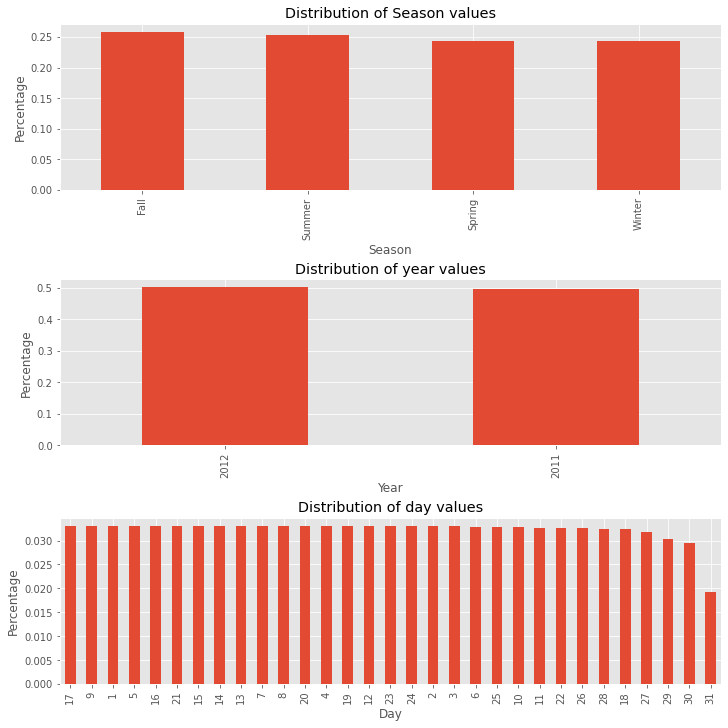

In [865]:
fig, axs = plt.subplots(3, 1, constrained_layout=True)

df2['season'].replace([1,2,3,4],['Spring', 'Summer', 'Fall', 'Winter']).value_counts(normalize = True).plot.bar(ax = axs[0])
axs[0].set_title('Distribution of Season values')
axs[0].set_ylabel('Percentage')
axs[0].set_xlabel('Season')

df2['year'].replace([0,1],['2011', '2012']).value_counts(normalize = True).plot.bar(ax = axs[1])
axs[1].set_title('Distribution of year values')
axs[1].set_ylabel('Percentage')
axs[1].set_xlabel('Year')

df2['day'].value_counts(normalize = True).plot.bar(ax = axs[2])
axs[2].set_title('Distribution of day values')
axs[2].set_ylabel('Percentage')
axs[2].set_xlabel('Day')


fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

#### Weekday, Workingday, Holiday columns:

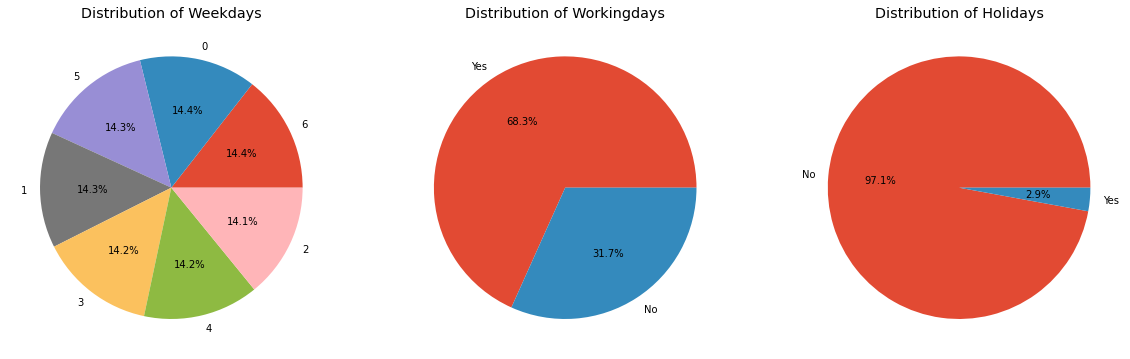

In [866]:
fig, axs = plt.subplots(1, 3)

pie_weekday = df2['weekday'].value_counts()
pie_workingday = df2['workingday'].replace([1,0],['Yes', 'No']).value_counts()
pie_holiday = df2['holiday'].replace([1,0],['Yes', 'No']).value_counts()

axs[0].set_title('Distribution of Weekdays')
axs[0].pie(pie_weekday.values, 
        labels=pie_weekday.index,
        autopct='%.1f%%')

axs[1].set_title('Distribution of Workingdays')
axs[1].pie(pie_workingday.values, 
        labels=pie_workingday.index,
        autopct='%.1f%%')

axs[2].set_title('Distribution of Holidays')
axs[2].pie(pie_holiday.values, 
        labels=pie_holiday.index,
        autopct='%.1f%%')


fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

As we can see, 
- Weekdays are almost equally distributed.
- There are more workingdays than weekend/holiday.
- There is a tiny portion of holidays.

#### Temperature and Feeling_temperature columns:

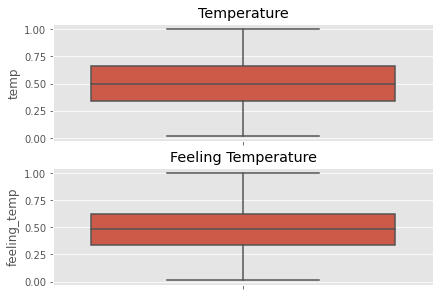

In [867]:
fig, axs = plt.subplots(2, 1, constrained_layout=True)
axs[0].set_title('Temperature')
plot = sns.boxplot(y=df2["temp"], ax = axs[0])
axs[1].set_title('Feeling Temperature')
plot = sns.boxplot(y=df2["feeling_temp"], ax = axs[1])

There are no outliers in these columns.

#### Windspeed and Humidiy columns:

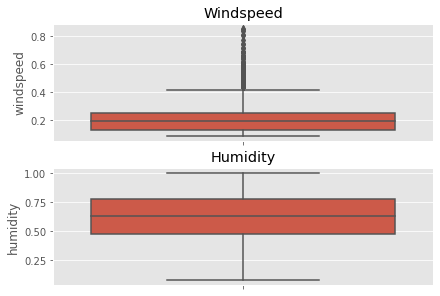

In [868]:
fig, axs = plt.subplots(2, 1, constrained_layout=True)
axs[0].set_title('Windspeed')
plot = sns.boxplot(y=df2["windspeed"], ax = axs[0])
axs[1].set_title('Humidity')
plot = sns.boxplot(y=df2["humidity"], ax = axs[1])

There are some outliers in these colums, so we have to deal with it.

#### Casual, Registered, Total users column:

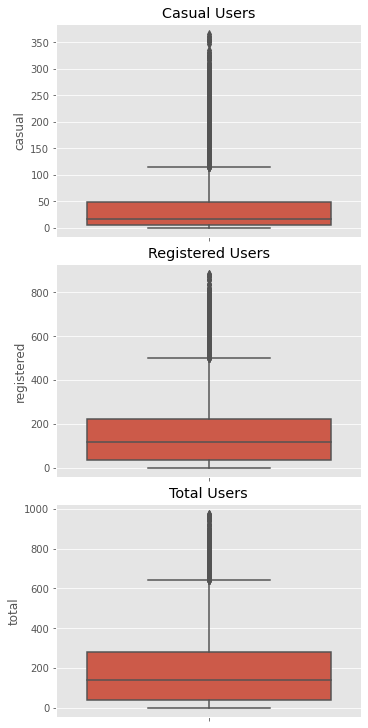

In [869]:
fig, axs = plt.subplots(3, 1, constrained_layout=True)
axs[0].set_title('Casual Users')
plot = sns.boxplot(y=df2["casual"], ax = axs[0])
axs[1].set_title('Registered Users')
plot = sns.boxplot(y=df2["registered"], ax = axs[1])
axs[2].set_title('Total Users')
plot = sns.boxplot(y=df2["total"], ax = axs[2])


fig = plt.gcf()
fig.set_size_inches(5,10)
plt.show()

There are outliers in all of these columns.

### Bivariate Analysis
Analyze two variable columns from the dataset

In [870]:
df3 = df2.copy()

##### Humidity vs Weather condition:

In [871]:
median_humidity = df3.groupby(['weather'])['humidity'].median()
print("Median humidity for various weathers: " , median_humidity)

Median humidity for various weathers:  weather
1    0.56
2    0.71
3    0.87
4    0.86
Name: humidity, dtype: float64


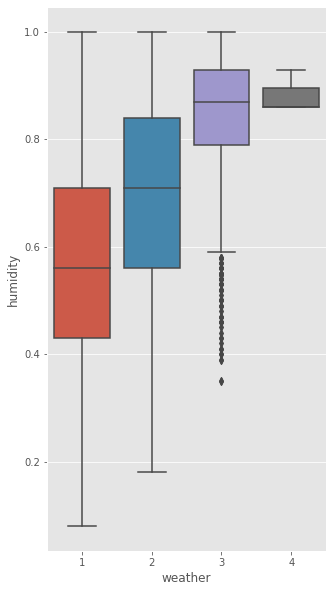

In [872]:
fig_dims = (5, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot("weather","humidity", data=df3, ax=ax);

In [873]:
df3 = df2.copy()

In [874]:
def impute_humidity(cols):
    humidity = cols[0]
    weather = cols[1]
    if weather == 3:
        if humidity < 0.68:
            return 0.87
        
        else:
            return humidity
    else:
        return humidity

In [875]:
df3['humidity'] = df3[['humidity','weather']].apply(impute_humidity,axis=1)

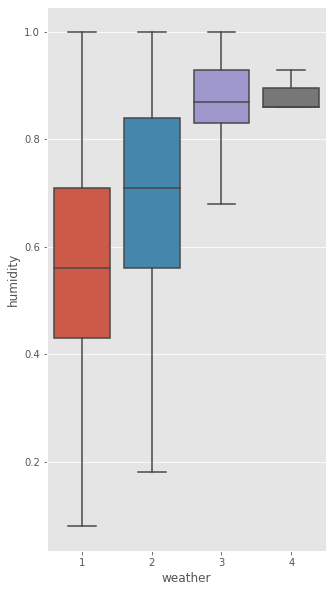

In [876]:
fig_dims = (5, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot("weather","humidity", data=df3, ax=ax);

##### Windspeed vs Weather condition:

In [877]:
median_windspeed = df3.groupby(['weather'])['windspeed'].median()
print("Median windspeed for various weathers: " , median_windspeed)

Median windspeed for various weathers:  weather
1    0.1940
2    0.1642
3    0.1940
4    0.1940
Name: windspeed, dtype: float64


In [878]:
df4 = df3.copy()

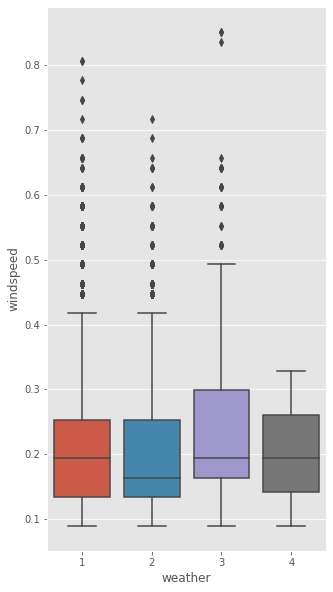

In [879]:
fig_dims = (5, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot("weather","windspeed", data=df4, ax=ax);

In [880]:
df4 = df3.copy()

In [881]:
def impute_windspeed(cols):
    windspeed = cols[0]
    weather = cols[1]

    if weather == 1:
        if windspeed > 0.44:
            return 0.1940
    if weather == 2:
        if windspeed > 0.44:
            return 0.1642
    if weather == 3:
        if windspeed > 0.49:
            return 0.1940
        
        else:
            return windspeed
    else:
        return windspeed

In [882]:
df4['windspeed'] = df4[['windspeed','weather']].apply(impute_windspeed,axis=1)

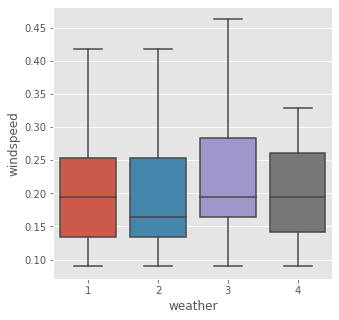

In [883]:
fig_dims = (5, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot("weather","windspeed", data=df4, ax=ax);

Now there are no outliers in this column.


#### Count of users during different weather conditions:

In [884]:
df5 = df4.copy()

- Total Users:

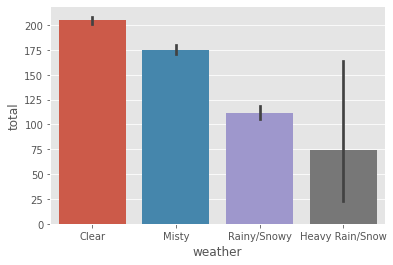

In [885]:
plot = sns.barplot(x=df5["weather"].replace([1,2,3,4],['Clear','Misty','Rainy/Snowy', 'Heavy Rain/Snow']), 
                   y=df5["total"])

 - Registered Users:

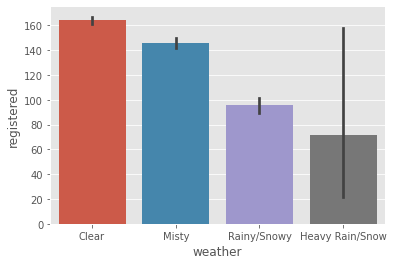

In [886]:
plot = sns.barplot(x=df5["weather"].replace([1,2,3,4],['Clear','Misty','Rainy/Snowy', 'Heavy Rain/Snow']), 
                   y=df5["registered"])

 - Casual Users:

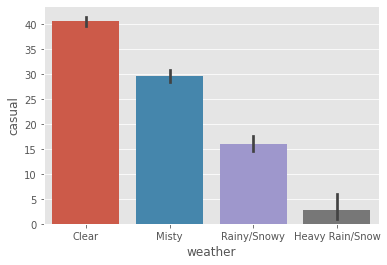

In [887]:
plot = sns.barplot(x=df5["weather"].replace([1,2,3,4],['Clear','Misty','Rainy/Snowy', 'Heavy Rain/Snow']), 
                   y=df5["casual"])

As we can see as the weather becomes adverse, the user count decreases. 

Handling Outliers in these three columns:

In [888]:
median_total = df5.groupby(['weather'])['total'].median()
median_registered = df5.groupby(['weather'])['registered'].median()
median_casual = df5.groupby(['weather'])['casual'].median()

In [889]:
print("Median of Total users for various weathers: " , median_total)
print("Median of Registerd users  for various weathers: " , median_registered)
print("Median of CVasual users  for various weathers: " , median_casual)

Median of Total users for various weathers:  weather
1    159
2    133
3     63
4     36
Name: total, dtype: int64
Median of Registerd users  for various weathers:  weather
1    128
2    111
3     55
4     35
Name: registered, dtype: int64
Median of CVasual users  for various weathers:  weather
1    20
2    15
3     5
4     1
Name: casual, dtype: int64


#### Total Users vs Weather condition:

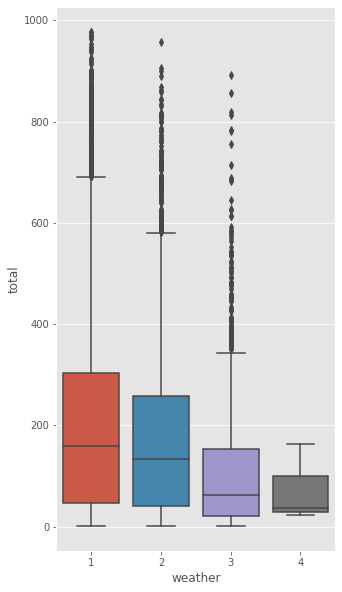

In [890]:
fig_dims = (5, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot("weather","total", data=df5, ax=ax);

In [891]:
df5 = df4.copy()

In [892]:
def impute_total(cols):
    total = cols[0]
    weather = cols[1]

    if weather == 1:
        if total > 618:
            return 159
    if weather == 2:
        if total > 501:
            return 133
    if weather == 3:
        if total > 127:
            return 63
        
        else:
            return total
    else:
        return total

In [893]:
df5['total'] = df5[['total','weather']].apply(impute_total,axis=1)

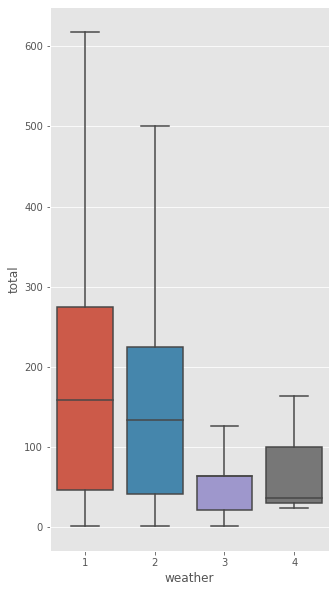

In [894]:
fig_dims = (5, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot("weather","total", data=df5, ax=ax);

#### Registered Users vs Weather condition:

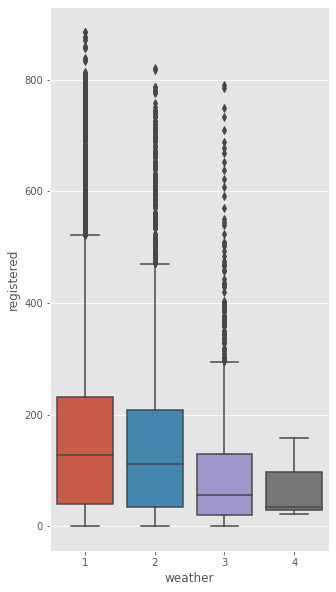

In [895]:
fig_dims = (5, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot("weather","registered", data=df5, ax=ax);

In [896]:
df5 = df4.copy()

In [897]:
def impute_registered(cols):
    registered = cols[0]
    weather = cols[1]

    if weather == 1:
        if registered > 436:
            return 128
    if weather == 2:
        if registered > 390:
            return 111
    if weather == 3:
        if registered > 109:
            return 55
        
        else:
            return registered
    else:
        return registered

In [898]:
df5['registered'] = df5[['registered','weather']].apply(impute_registered,axis=1)

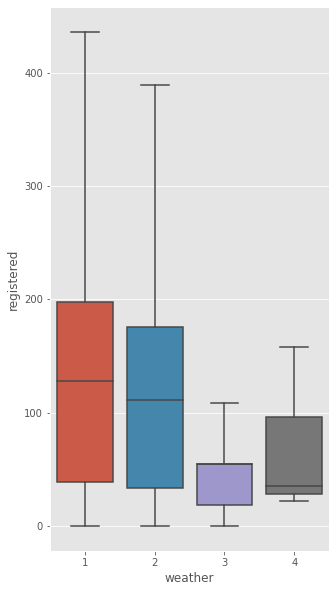

In [899]:
fig_dims = (5, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot("weather","registered", data=df5, ax=ax);

#### Casual Users vs Weather condition:

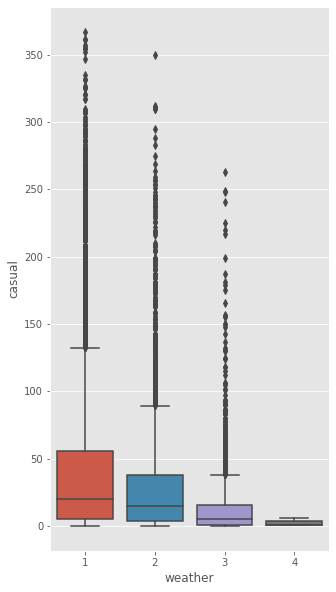

In [900]:
fig_dims = (5, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot("weather","casual", data=df5, ax=ax);

In [901]:
df5 = df4.copy()

In [902]:
def impute_casual(cols):
    casual = cols[0]
    weather = cols[1]

    if weather == 1:
        if casual > 42:
            return 20
    if weather == 2:
        if casual > 31:
            return 15
    if weather == 3:
        if casual > 11:
            return 5
        
        else:
            return casual
    else:
        return casual

In [903]:
df5['casual'] = df5[['casual','weather']].apply(impute_casual,axis=1)

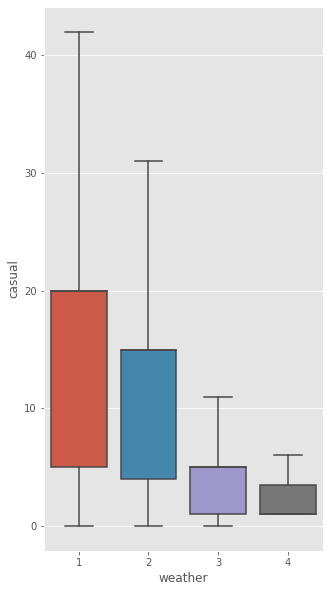

In [904]:
fig_dims = (5, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot("weather","casual", data=df5, ax=ax);

Now there are no Outliers in these columns.

#### Count of users during different years:

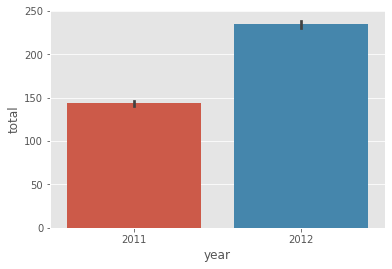

In [905]:
plot = sns.barplot(x=df5["year"].replace([0,1],['2011','2012']), 
                   y=df5["total"])

#### Count of users during different seasons:

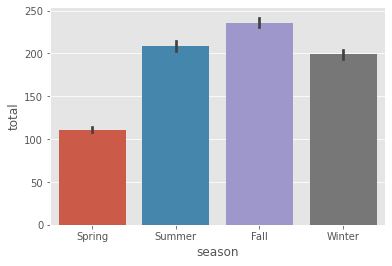

In [906]:
plot = sns.barplot(x=df5["season"].replace([1,2,3,4],['Spring','Summer','Fall', 'Winter']), 
                   y=df5["total"])

The number of users is highest for the Fall season and lowest for the Spring season.

#### Count of users during different months:

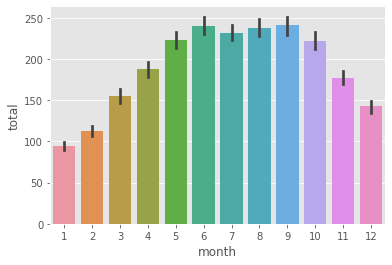

In [907]:
plot = sns.barplot(x=df5["month"], y=df5["total"])

#### Count of users during different weekdays:

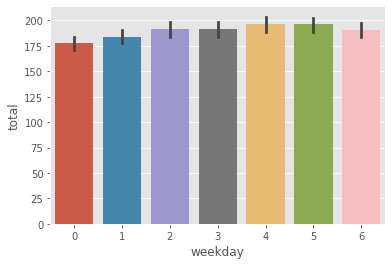

In [908]:
plot = sns.barplot(x=df5["weekday"], y=df5["total"])

#### Count of users during various hours of the day:

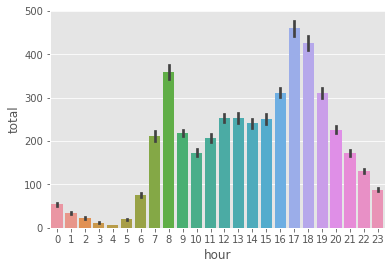

In [909]:
plot = sns.barplot(x=df5["hour"], y=df5["total"])

As we can see the user count is very high for 8am in the morning and 5-6pm in the evening. At that time people go to work and come home from work , so user count is high.


### Multivariate Analysis
Analyze three or more variable columns from the dataset

#### User count during the hours of the day for offdays and workingdays:

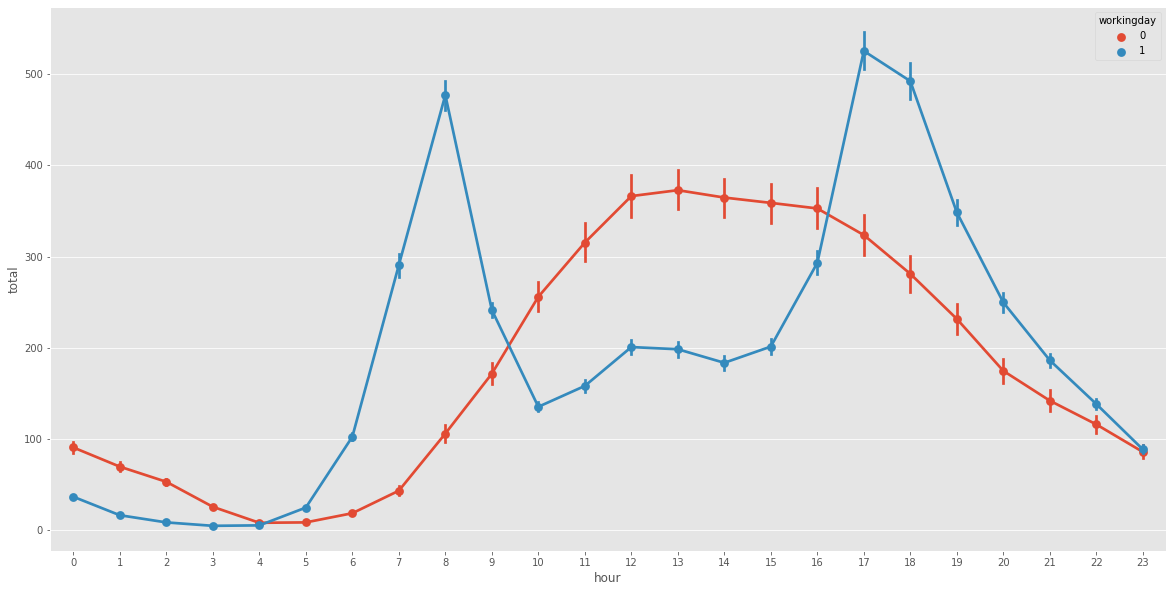

In [910]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df5, x='hour', y='total', hue='workingday', ax=ax);

From this plot we can see during the working day the users increases in the morning and evening when people go to work and come home from work. And during the off days the users increases gradually during the day and also decreases gradually during evening.


### Correlation Matrix:
This matrix demonstrate the relationship between every columns.

In [934]:
df6 = df5.copy()

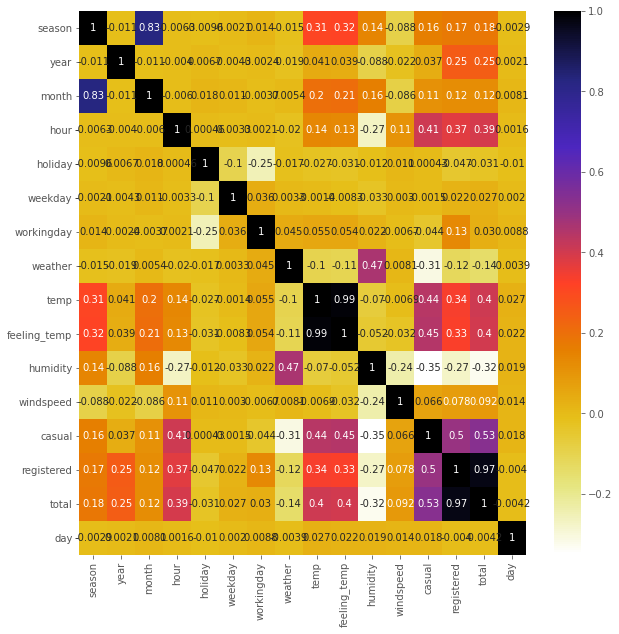

In [935]:
plt.figure(figsize = (10,10))
corr_matrix = df6.corr(method='pearson')
sns.heatmap(corr_matrix, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

In [936]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [937]:
corr_features = correlation(df6, 0.75)
len(set(corr_features))

3

In [938]:
corr_features

{'feeling_temp', 'month', 'total'}

Here the 'feeling_temp' column is highly correlated with the 'temp' column, and 'Month' is highly correlated with 'season'. We will drop these column. As the 'total' column is our target variable we will ignore that. In that case we will drop the 'registered' column.

In [939]:
df6.drop(['feeling_temp', 'month', 'registered', 'casual'], axis =1, inplace = True)

We have also dropped the 'casual' column as it is also a output variable.

## Dealing with categorical columns:

The categorical columns are: 
 - season
 - year
 - hour
 - holiday
 - weekday
 - workingday
 - weather

#### One Hot Encoding:

In [940]:
def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

cols = ['season','year','hour','holiday','weekday','workingday','weather']

for col in cols:
    df6 = one_hot_encoding(df6, col)

## Saving the Dataset for modeling:

In [945]:
df6.to_csv('data/hour_data_final.csv',index=False)